In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Dataset.csv')

df.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 24)

In [5]:
df.dtypes

Unnamed: 0                        int64
Date                             object
Weather Station                  object
Minimum Temperature             float64
Maximum Temperature             float64
Rainfall                        float64
Evaporation                     float64
Sunshine                        float64
Gust Trajectory                  object
Air Velocity                    float64
Gust Trajectory at  9 AM         object
Gust Trajectory at  3 PM         object
Air Velocity at  9 AM           float64
Air Velocity at  3 PM           float64
Moisture Level at 9 AM          float64
Moisture Level at 3 PM          float64
Atmospheric Pressure at 9 AM    float64
Atmospheric Pressure at 3 PM    float64
Cloudiness at 9 AM              float64
Cloudiness at 3 PM              float64
Recorded Temperature at 9 AM    float64
Recorded Temperature at 3 PM    float64
Rain that day                    object
Rain the day after               object
dtype: object

In [6]:
#convert time to int
import datetime
# df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['Date'] = df['Year'] * 10000 + df['Month'] * 100 + df['Day']
# df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime("%Y%m%d").astype(int)

In [7]:
#null rows
df.isnull().sum()

Unnamed: 0                          0
Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

In [8]:
df['Minimum Temperature'] = df['Minimum Temperature'].interpolate(method = 'linear',limit_direction ='both')
df['Maximum Temperature'] = df['Maximum Temperature'].interpolate(method = 'linear',limit_direction ='both')
df['Rainfall'] = df['Rainfall'].interpolate(method = 'linear',limit_direction ='both')

In [9]:
df = df.drop_duplicates()

In [10]:
#percentage of null values
percentage_of_na = pd.DataFrame(round(df.isnull().sum() / len(df) * 100, 2))
percentage_of_na.rename(columns={0:'percentage of missing values'})

,percentage of missing values
Unnamed: 0,0.00
Date,0.00
Weather Station,0.00
Minimum Temperature,0.00
Maximum Temperature,0.00
Rainfall,0.00
Evaporation,43.17
Sunshine,48.01
Gust Trajectory,7.10
Air Velocity,7.06


In [11]:
# # Drop row that has more than 30% missing values
df = df.drop('Evaporation', axis=1)
df = df.drop('Sunshine', axis=1)
df = df.drop('Cloudiness at 9 AM', axis=1)
df = df.drop('Cloudiness at 3 PM', axis=1)

In [12]:
df.isnull().sum()

Unnamed: 0                          0
Date                                0
Weather Station                     0
Minimum Temperature                 0
Maximum Temperature                 0
Rainfall                            0
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

In [13]:
#convert catgorical columns to numerical using labelencoder
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Weather Station']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [14]:
#convert catgorical columns to numerical using one hot encoder
from sklearn.preprocessing import OneHotEncoder
# Create a one-hot encoder
ohe = OneHotEncoder(sparse_output=False)
y = df['Rain that day'].values.reshape(-1,1)
y_ohe = ohe.fit_transform(y)

# Keep only the column for 'Rain' 
y_binary = y_ohe[:,1] 

# Reset the target column
df['Rain that day'] = y_binary



In [15]:
from sklearn.preprocessing import OneHotEncoder
# Create a one-hot encoder
ohe1 = OneHotEncoder(sparse_output=False)
y1 = df['Rain the day after'].values.reshape(-1,1)
y_ohe1 = ohe1.fit_transform(y1)

# Keep only the column for 'Rain' 
y_binary1 = y_ohe1[:,1] 

# Reset the target column
df['Rain the day after'] = y_binary1

In [16]:
df.shape

(145460, 20)

In [17]:
#drop rows with null values
df.dropna(axis=0, inplace=True)

In [18]:
#handling outliers 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

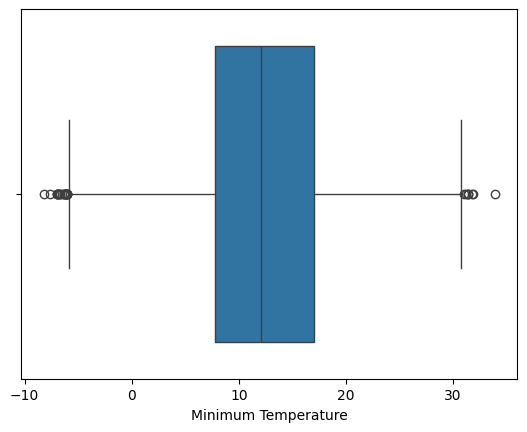

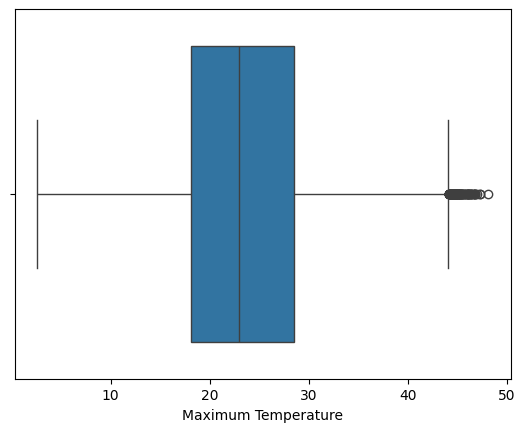

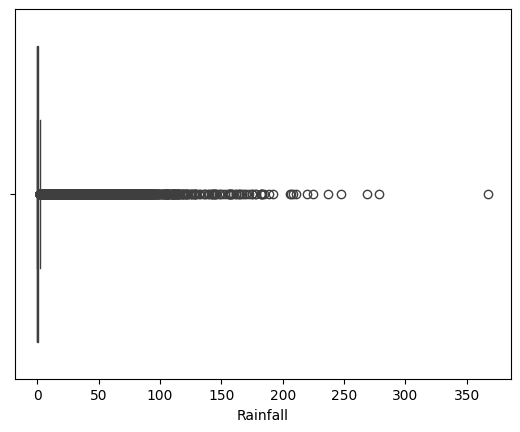

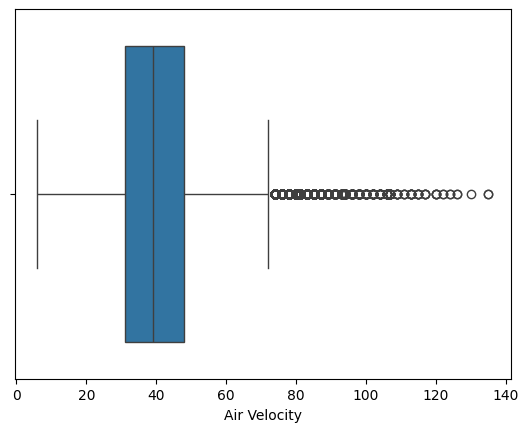

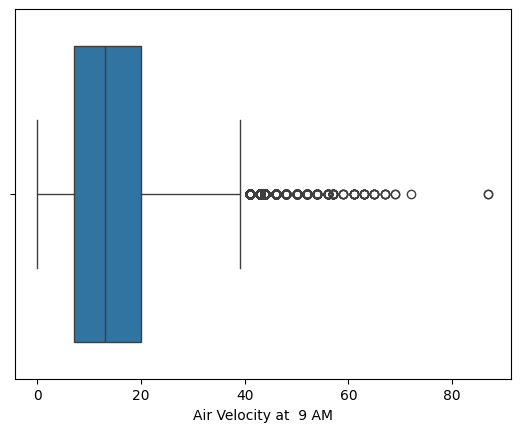

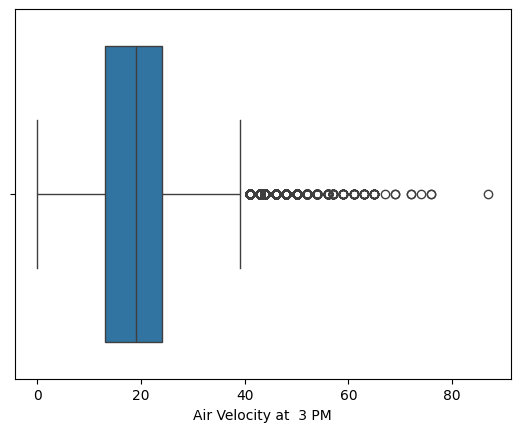

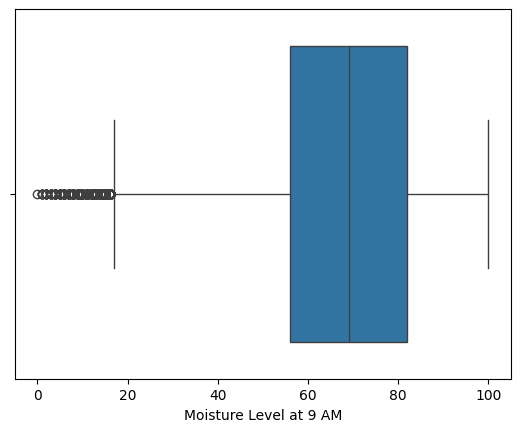

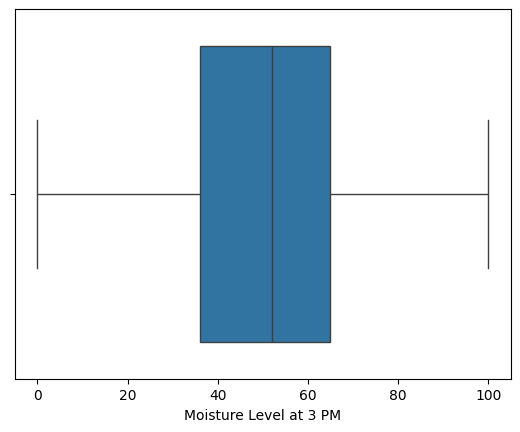

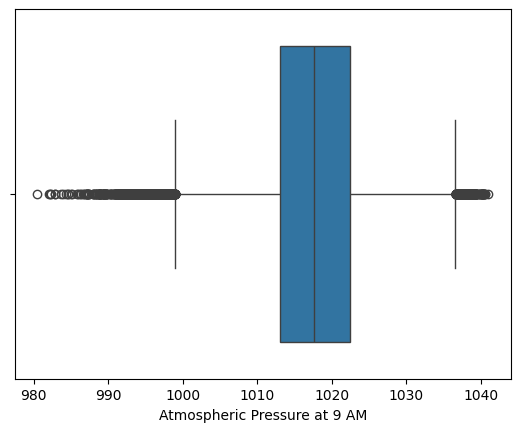

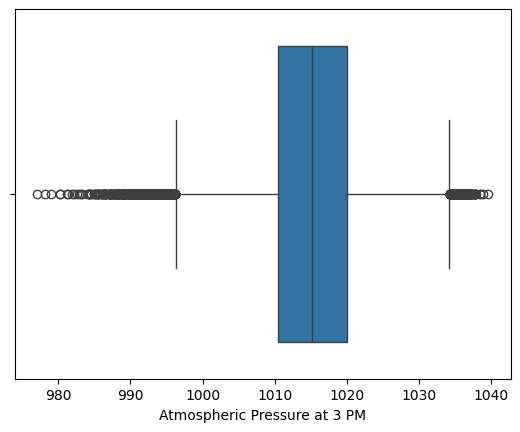

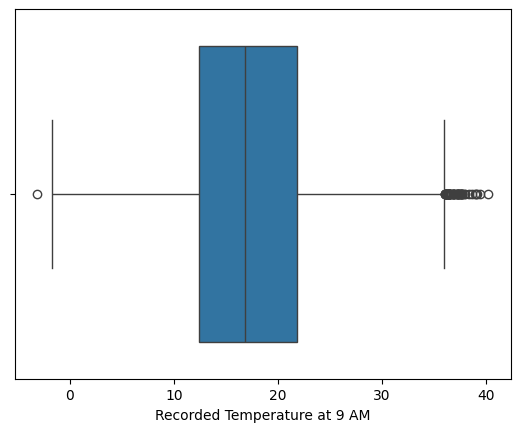

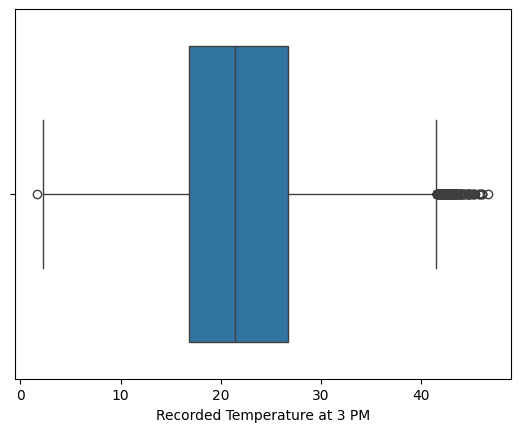

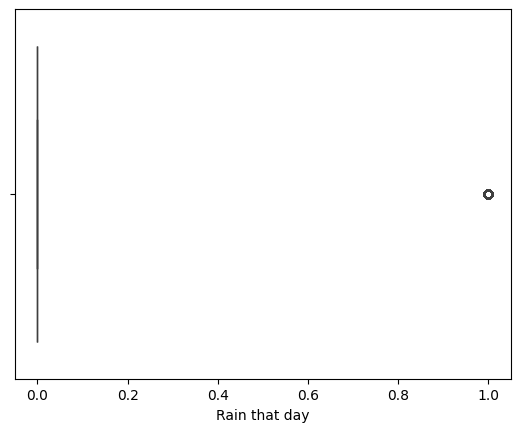

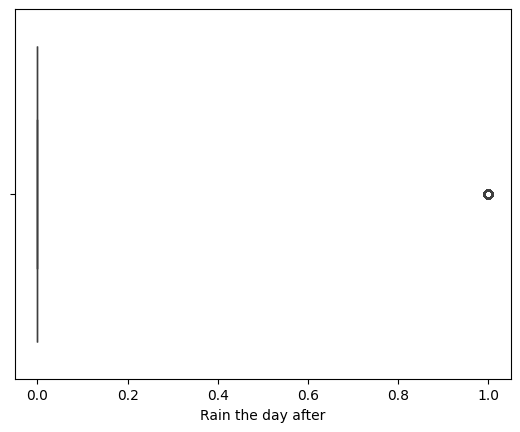

In [19]:
for col in df.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

In [20]:
data = df.drop('Rain the day after', axis=1)
columns_to_remove_outliers = data.select_dtypes(include=float).columns

for col in columns_to_remove_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

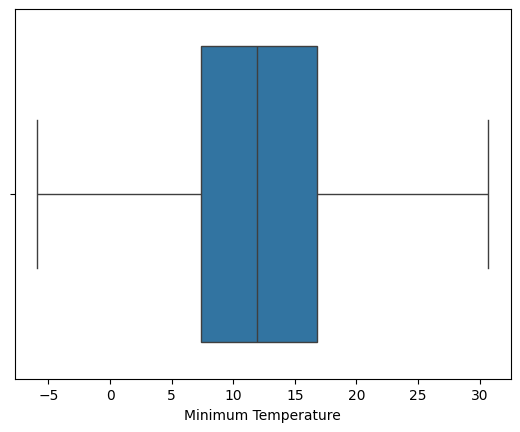

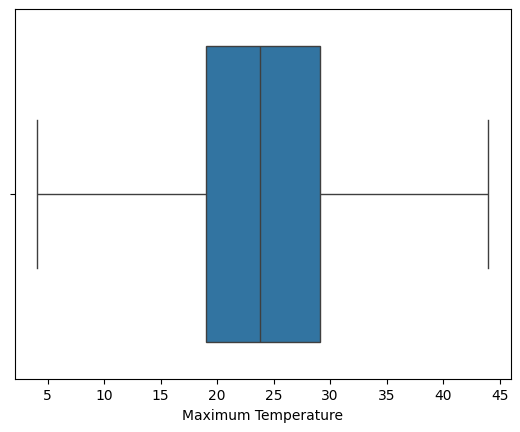

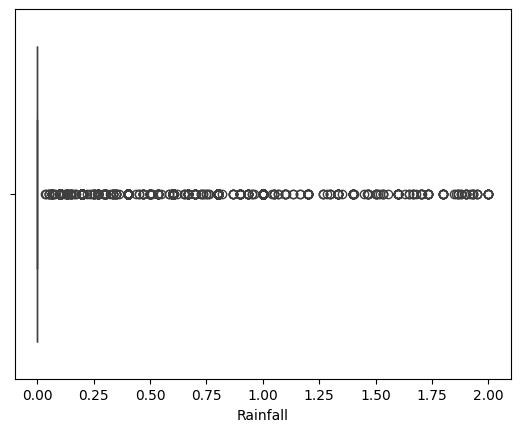

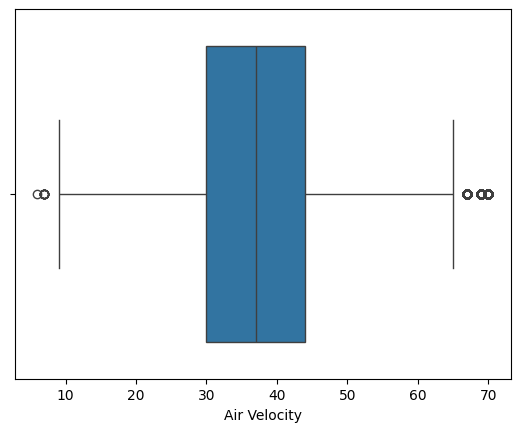

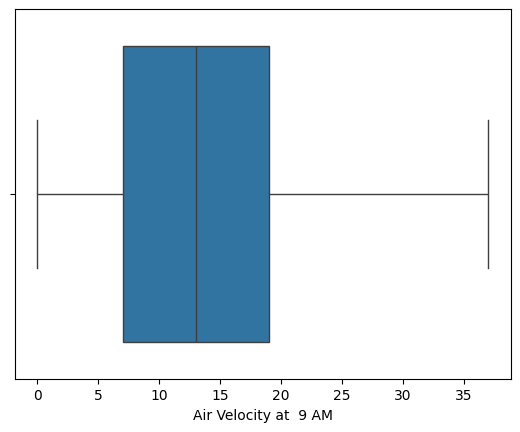

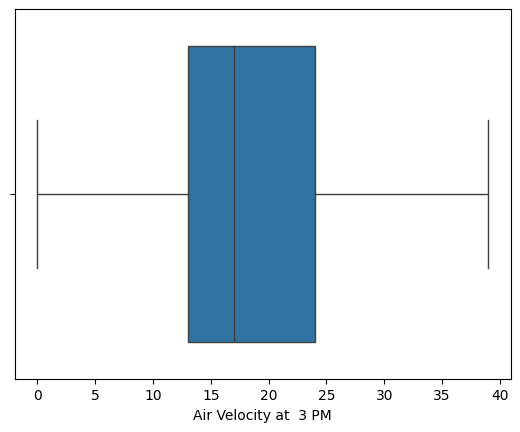

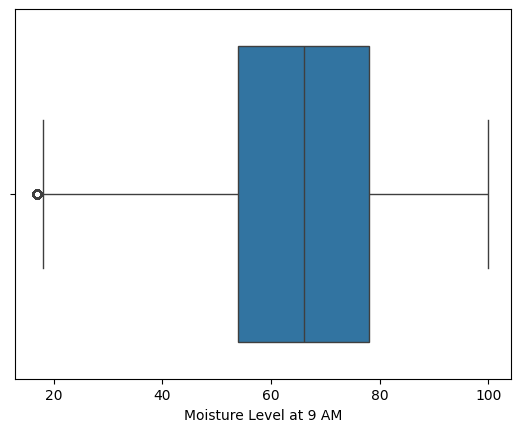

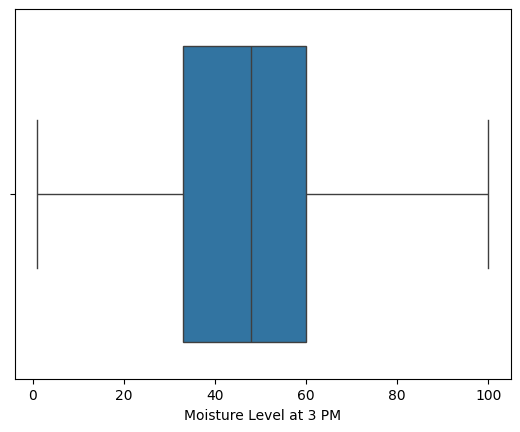

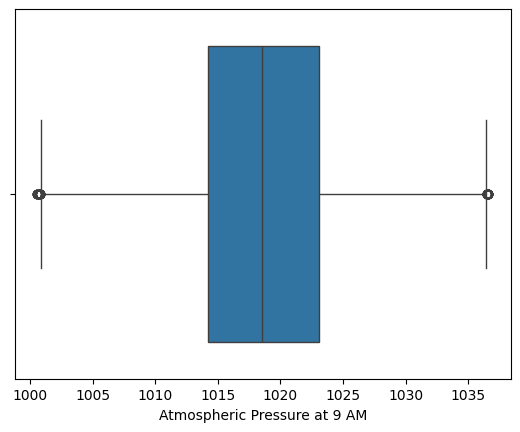

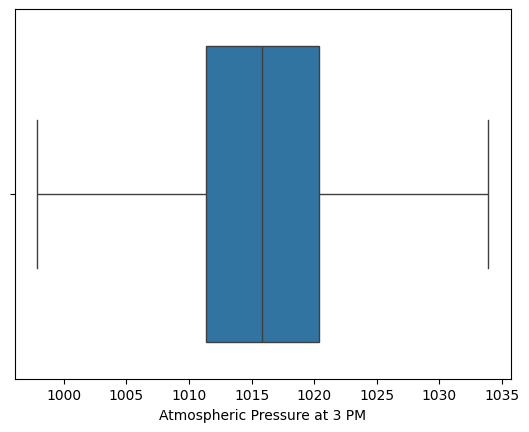

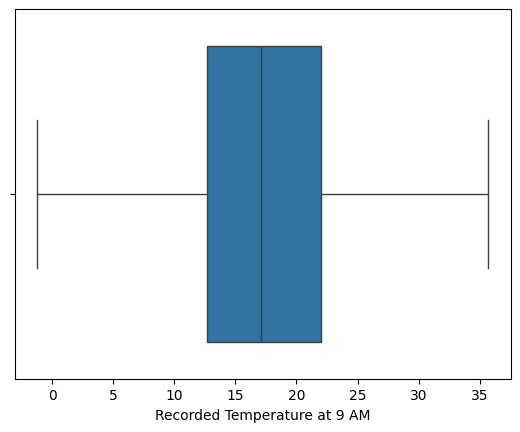

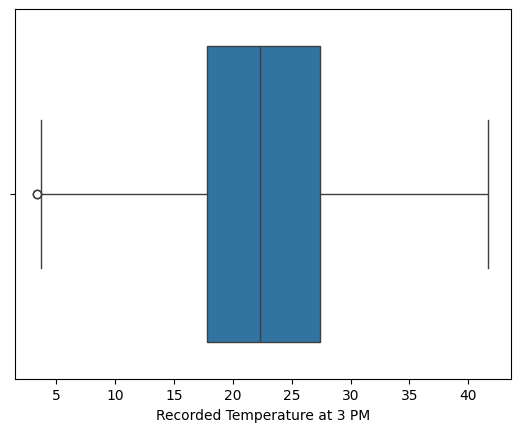

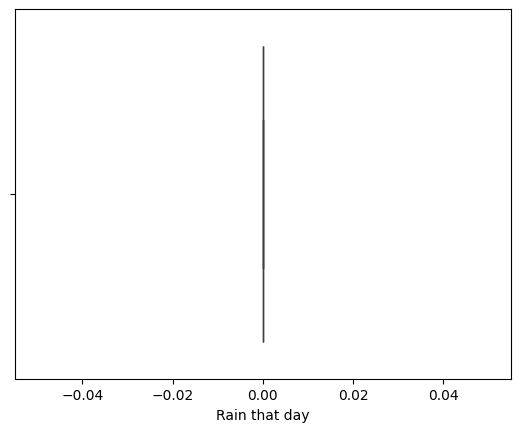

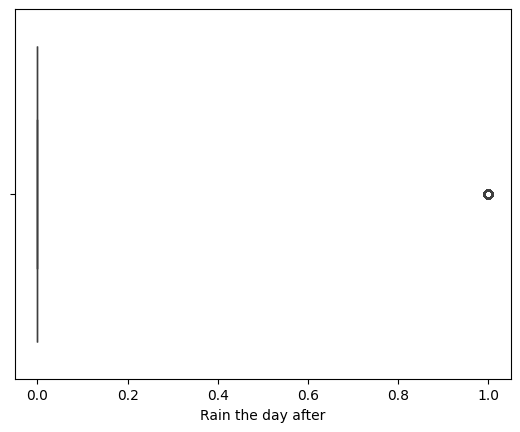

In [21]:
for col in df.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

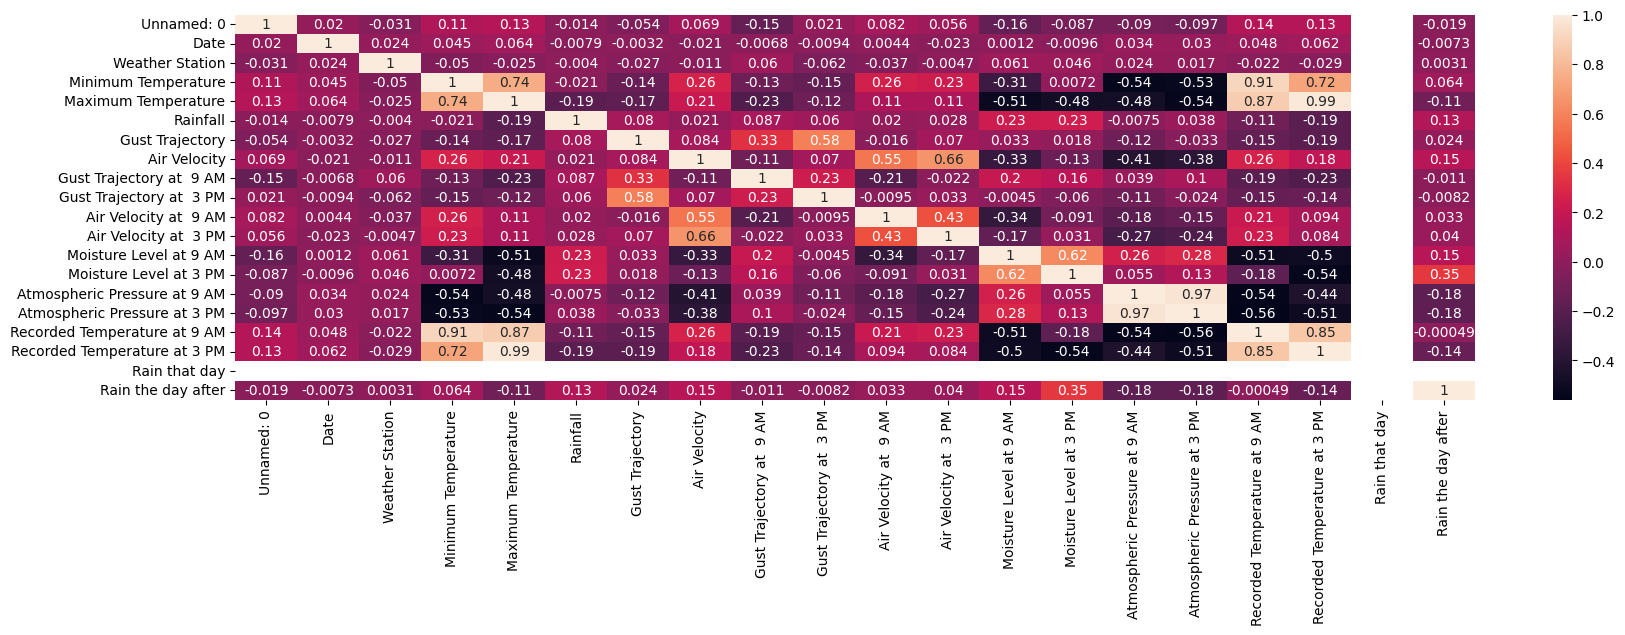

In [22]:
#using heatmap for correlation 
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
#drop columns with more that 0.9 correlation
df = df.drop('Recorded Temperature at 3 PM', axis=1)
df = df.drop('Atmospheric Pressure at 9 AM', axis=1)
df = df.drop('Recorded Temperature at 9 AM', axis=1)


In [24]:
df.shape

(89301, 17)

In [25]:
df.shape

(89301, 17)

In [26]:
X = df.drop('Rain the day after', axis=1)
Y = df['Rain the day after']

In [27]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
print(df['Rain the day after'].value_counts())

Rain the day after
0.0    76624
1.0    12677
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=41)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

In [31]:
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(knn, X, Y, cv=5)
svm_scores = cross_val_score(svm, X, Y, cv=5) 
dt_scores = cross_val_score(dt, X, Y, cv=3)

In [32]:
print('KNN CV scores:', knn_scores.mean(), knn_scores.std()) 
print('SVM CV scores:', svm_scores.mean(), svm_scores.std())
print('DT CV scores:', dt_scores.mean(), dt_scores.std())

KNN CV scores: 0.6019079619003863 0.1461281838979027
SVM CV scores: 0.858041903531144 2.560628289798716e-05
DT CV scores: 0.5670485212931546 0.28240672513449694


In [33]:
knn.fit(X, Y) 
svm.fit(X, Y)
dt.fit(X, Y)

DecisionTreeClassifier()

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0.0: 49066, 1.0: 8086})
The number of classes after fit Counter({0.0: 49066, 1.0: 49066})


In [35]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

svm_params = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': range(3,10)} 
dt_params = {'max_depth': range(3,10)}


In [36]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=5)
grid_knn.fit(X_train, Y_train)
best_knn = grid_knn.best_estimator_ 
print(best_knn)

KNeighborsClassifier(n_neighbors=8)


In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)
classifier.fit(X_val, Y_val)

KNeighborsClassifier(n_neighbors=8)

In [38]:
val_pred = classifier.predict(X_val)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val, val_pred))
print(confusion_matrix(Y_val, val_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     12227
         1.0       0.67      0.04      0.08      2061

    accuracy                           0.86     14288
   macro avg       0.77      0.52      0.50     14288
weighted avg       0.83      0.86      0.80     14288

[[12185    42]
 [ 1975    86]]


In [40]:
Y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     15331
         1.0       0.33      0.02      0.04      2530

    accuracy                           0.86     17861
   macro avg       0.60      0.51      0.48     17861
weighted avg       0.79      0.86      0.80     17861

[[15227   104]
 [ 2478    52]]


In [42]:
# Decision Tree
dt = DecisionTreeClassifier()  
grid_dt = GridSearchCV(dt, dt_params, cv=5)
grid_dt.fit(X_train, Y_train)

best_dt = grid_dt.best_estimator_
print(best_dt)

DecisionTreeClassifier(max_depth=6)


In [43]:
from sklearn.tree import DecisionTreeClassifier

Tree=DecisionTreeClassifier(max_depth=6)
Tree.fit(X_train, Y_train)
Tree.fit(X_val, Y_val)

DecisionTreeClassifier(max_depth=6)

In [44]:
val_tree=Tree.predict(X_val)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val, val_tree))
print(confusion_matrix(Y_val, val_tree))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94     12227
         1.0       0.70      0.36      0.47      2061

    accuracy                           0.89     14288
   macro avg       0.80      0.67      0.71     14288
weighted avg       0.87      0.89      0.87     14288

[[11902   325]
 [ 1318   743]]


In [46]:
pred_tree = Tree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, pred_tree))
print(confusion_matrix(Y_test, pred_tree))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     15331
         1.0       0.58      0.31      0.40      2530

    accuracy                           0.87     17861
   macro avg       0.74      0.64      0.66     17861
weighted avg       0.85      0.87      0.85     17861

[[14775   556]
 [ 1753   777]]


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.utils import resample


# # svm = SVC()
# # X_svm_train, X_svm_val, Y_svm_train, Y_svm_val = train_test_split(X_train, Y_train, test_size=0.1)
# # X_svm_train, Y_svm_train = resample(X_svm_train, Y_svm_train, 
# #                                  replace=False, n_samples=8000) 
# # grid_svm = GridSearchCV(svm, svm_params, cv=3)
# # grid_svm.fit(X_svm_train, Y_svm_train)

# #PCA
# pca = PCA(n_components=9)  # Specify the desired number of components
# X_train_pca = pca.fit_transform(X_train)
# X_val_pca = pca.transform(X_val)
# X_test_pca = pca.transform(X_test)
# # Reduce the training data size
# X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, train_size=0.1, stratify=Y_train)
# X_svm_train, X_svm_val, Y_svm_train, Y_svm_val = train_test_split(X_train_small, Y_train_small, test_size=0.1)

# # Resample the training data with replacement when necessary
# if len(X_svm_train) < 8000:
#     X_svm_train, Y_svm_train = resample(X_svm_train, Y_svm_train, replace=True, n_samples=8000)
# else:
#     X_svm_train, Y_svm_train = resample(X_svm_train, Y_svm_train, replace=False, n_samples=8000)

# # Perform grid search
# svm = SVC()
# grid_svm = GridSearchCV(svm, svm_params, cv=3, n_jobs=-1)
# grid_svm.fit(X_svm_train, Y_svm_train)

# # Get the best SVM estimator from grid search
# best_svm = grid_svm.best_estimator_

# print(best_svm)
X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, train_size=0.1, stratify=Y_train)
# Split the smaller training data into SVM training and validation sets
X_svm_train, X_svm_val, Y_svm_train, Y_svm_val = train_test_split(X_train_small, Y_train_small, test_size=0.1)
# Resample the training data with replacement if necessary
if len(X_svm_train) < 8000:
    X_svm_train, Y_svm_train = resample(X_svm_train, Y_svm_train, replace=True, n_samples=8000)
else:
    X_svm_train, Y_svm_train = resample(X_svm_train, Y_svm_train, replace=False, n_samples=8000)
# Perform PCA for dimensionality reduction
pca = PCA(n_components=9)  # Specify the desired number of components
X_svm_train_pca = pca.fit_transform(X_svm_train)

# Perform grid search on the reduced-dimensional data
svm = SVC()
grid_svm = GridSearchCV(svm, svm_params, cv=3, n_jobs=-1)
grid_svm.fit(X_svm_train_pca, Y_svm_train)

# Get the best SVM estimator from grid search
best_svm = grid_svm.best_estimator_
print(best_svm)

KeyboardInterrupt: 

In [ ]:
from sklearn import svm
val_svm = best_svm.predict(X_svm_val)
print(classification_report(Y_svm_val, val_svm))

In [ ]:
from sklearn.metrics import accuracy_score
pred_svm = best_svm.predict(X_test)

print("Accuracy Score:", accuracy_score(Y_test, pred_svm))
print(confusion_matrix(Y_test, pred_svm))  
print(classification_report(Y_test, pred_svm))